<a href="https://colab.research.google.com/github/firarru/ML-Manual-Naive-Bayes/blob/main/ML_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('https://github.com/firarru/ML-Manual-Naive-Bayes/raw/refs/heads/main/Dataset/CAD.xlsx')
df

,No,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,1,53,90,175,Male,29.387755,0,1,1,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,2,67,70,157,Fmale,28.398718,0,1,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,3,54,54,164,Male,20.077335,0,0,1,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,4,66,67,158,Fmale,26.838648,0,1,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,5,50,87,153,Fmale,37.165193,0,1,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,58,84,168,Male,29.761905,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,300,55,64,152,Fmale,27.700831,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,301,48,77,160,Fmale,30.078125,0,1,0,0,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,302,57,90,159,Fmale,35.599858,1,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     303 non-null    int64  
 1   Age                    303 non-null    int64  
 2   Weight                 303 non-null    int64  
 3   Length                 303 non-null    int64  
 4   Sex                    303 non-null    object 
 5   BMI                    303 non-null    float64
 6   DM                     303 non-null    int64  
 7   HTN                    303 non-null    int64  
 8   Current Smoker         303 non-null    int64  
 9   EX-Smoker              303 non-null    int64  
 10  FH                     303 non-null    int64  
 11  Obesity                303 non-null    object 
 12  CRF                    303 non-null    object 
 13  CVA                    303 non-null    object 
 14  Airway disease         303 non-null    object 
 15  Thyroi

Kita pisahkan variabel dependen(target) dan variabel independen. Dalam kasus ini, variabel dependen merupakan fitur Cath dan fitur yang lain merupakan variabel independen

In [4]:
X = df.loc[:, df.columns != 'Cath'] #fitur
Y = df['Cath']  # target

Karena Naive Bayes memakai probabilitas, maka fitur kategorik tidak perlu dilakukan encoding namun akan dihitung probalitiasnya berdasarkan frekuensi relatif setiap kelas

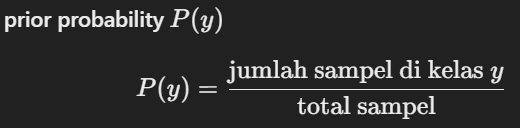

In [5]:
prior_prob = Y.value_counts(normalize=True)

Kemudian kita pisahkan fitur numerik dan kategorik

In [6]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

Selanjutnya adalah menghitung likelihood fitur numerik dan katgeorik

In [8]:
means = X[num_features].groupby(Y).mean()
stds = X[num_features].groupby(Y).std()

In [9]:
likelihood_cat = {}
for col in cat_features:
    likelihood_cat[col] = X.groupby(Y)[col].value_counts(normalize=True).unstack()

Kita akan hitung probabilitas Guassian

In [10]:
def gaussian_prob(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi * std**2))) * np.exp(-((x - mean)**2 / (2 * std**2)))

In [14]:
def predict(sample):
    posteriors = {}

    for class_label in Y.unique():
        posteriors[class_label] = prior_prob[class_label]  # Mulai dengan prior

        # Hitung likelihood numerik
        for col in num_features:
            mean = means.loc[class_label, col]
            std = stds.loc[class_label, col]
            posteriors[class_label] *= gaussian_prob(sample[col], mean, std)

        # Hitung likelihood kategorikal
        for col in cat_features:
            if sample[col] in likelihood_cat[col].columns:
                posteriors[class_label] *= likelihood_cat[col].loc[class_label, sample[col]]

    return max(posteriors, key=posteriors.get)  # Ambil kelas dengan probabilitas tertinggi

predictions = X.apply(predict, axis=1)

<ipython-input-10-ad3c8167a761>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / (np.sqrt(2 * np.pi * std**2))) * np.exp(-((x - mean)**2 / (2 * std**2)))
<ipython-input-10-ad3c8167a761>:2: RuntimeWarning: invalid value encountered in scalar divide
  return (1 / (np.sqrt(2 * np.pi * std**2))) * np.exp(-((x - mean)**2 / (2 * std**2)))
<ipython-input-10-ad3c8167a761>:2: RuntimeWarning: invalid value encountered in scalar multiply
  return (1 / (np.sqrt(2 * np.pi * std**2))) * np.exp(-((x - mean)**2 / (2 * std**2)))


In [13]:
predictions

,0
0,Cad
1,Cad
2,Cad
3,Cad
4,Cad
...,...
298,Cad
299,Cad
300,Cad
301,Cad


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

In [19]:
prior_prob = y_train.value_counts(normalize=True)

In [20]:
means = X_train[num_features].groupby(y_train).mean()
stds = X_train[num_features].groupby(y_train).std()

In [21]:
likelihood_cat = {}
for col in cat_features:
    likelihood_cat[col] = X_train.groupby(y_train)[col].value_counts(normalize=True).unstack()

In [22]:
# Fungsi untuk menghitung probabilitas Gaussian
def gaussian_prob(x, mean, std):
    if std == 0:  # Hindari pembagian dengan nol
        return 1 if x == mean else 0
    return (1 / (np.sqrt(2 * np.pi * std**2))) * np.exp(-((x - mean)**2 / (2 * std**2)))

# Fungsi prediksi untuk satu sampel
def predict(sample):
    posteriors = {}

    for class_label in y_train.unique():
        posteriors[class_label] = prior_prob[class_label]  # Mulai dengan prior

        # Hitung likelihood numerik
        for col in num_features:
            mean = means.loc[class_label, col]
            std = stds.loc[class_label, col]
            posteriors[class_label] *= gaussian_prob(sample[col], mean, std)

        # Hitung likelihood kategorikal
        for col in cat_features:
            if sample[col] in likelihood_cat[col].columns:
                posteriors[class_label] *= likelihood_cat[col].loc[class_label, sample[col]]

    return max(posteriors, key=posteriors.get)  # Ambil kelas dengan probabilitas tertinggi

In [23]:
predictions = X_test.apply(predict, axis=1)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
print("Akurasi Model Naïve Bayes Manual:", accuracy)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Akurasi Model Naïve Bayes Manual: 0.8852459016393442
Confusion Matrix:
[[41  2]
 [ 5 13]]
